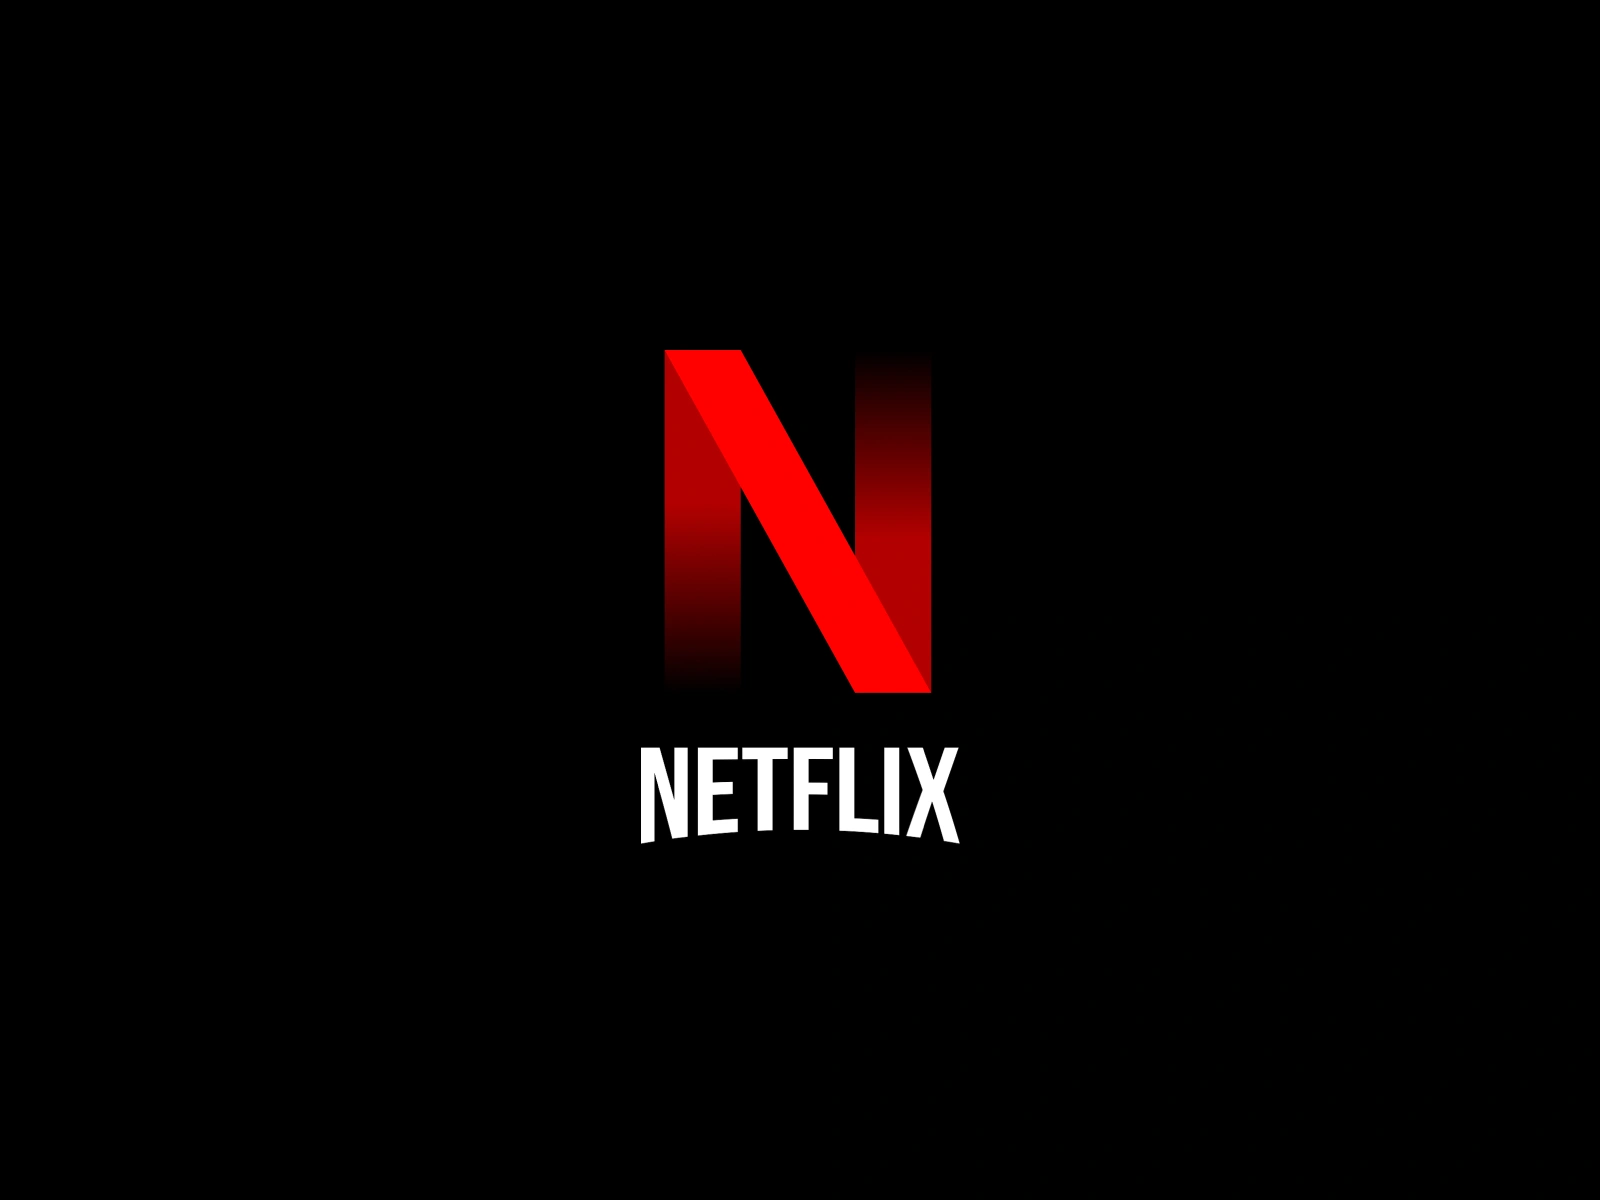

# Netflix Analysis

Problem Statement : Explore out the briefer analysis on Netflix Dataset with an access to noticeable feature attributes for Movies/TV Shows with Viewership Score and present the justifiable insights in points along with an overall summary.

Dataset:'netflix daily top 10.csv'.
(Netflix Top 10 Shows for the period 2020-2022)

In [10]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [14]:
#Loading the dataset
df = pd.read_csv('netflix daily top 10.csv')
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


### 📊Data Overview

The dataset comprises the following columns:

- As of: Date of ranking.
- Rank: Current rank on that date.
- Year to Date Rank: Cumulative rank for the year.
- Last Week Rank: Rank from the previous week.
- Title: Name of the movie or TV show.
- Type: Whether it's a TV Show or Movie.
- Netflix Exclusive: Indicates if it's exclusive to Netflix.
- Netflix Release Date: Release date on Netflix.
- Days In Top 10: Number of days the title remained in the Top 10.
- Viewership Score: A metric quantifying popularity.

In [19]:
# Size or the shape of dataset
df.shape

(7100, 10)

### Pre process cleaning and orgainzing data

In [22]:
# checking if there is any missing or null value
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [24]:
# check if there is any duplicate values
df[df.duplicated(keep=False)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score


In [26]:
# Remove any blank space in the column variable 
df.columns = df.columns.str.strip()
df.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

In [28]:
# converting the 'as of' and 'netflix release date' to datetime format
df['As of']= pd.to_datetime(df['As of'])
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'], errors = 'coerce')

In [30]:
# Filling the missing values in the 'netflix exclusive'
df['Netflix Exclusive'] = df['Netflix Exclusive'].fillna('No')
df['Netflix Exclusive'].head()

0    Yes
1    Yes
2     No
3     No
4    Yes
Name: Netflix Exclusive, dtype: object

In [32]:
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,2018-09-14,4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,2020-03-26,2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,2020-02-13,9,40
8,2020-04-01,9,8,-,Badland,Movie,No,2020-03-26,4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,2020-03-27,4,15


### Considering the use cases that align well with the data at hand. Potential use cases could include:

- Trends in Viewership Scores: How do viewership scores change over time?
        
- Effectiveness of Netflix Exclusives: Do Netflix exclusives perform better than non-exclusives?
        
- TV Shows vs Movies: Which type tends to perform better in the top 10?
        
- Popular Titles: Which titles consistently appear in the Top 10 with high viewership?

In [35]:
# Describe the stats for all numberical columns
df.describe()

,As of,Rank,Netflix Release Date,Days In Top 10,Viewership Score
count,7100,7100.000000,7100,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,2020-06-21 08:05:32.619718144,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,2007-01-15 00:00:00,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,2020-04-26 00:00:00,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,2020-10-02 00:00:00,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,2021-05-14 00:00:00,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,2022-03-04 00:00:00,428.000000,1474.000000
std,NaN,2.872484,NaN,58.473789,213.861642


In [37]:
# Groupby 'title' aggregation on 'viewership score' and 'days in top 10'

title_st = df.groupby('Title').agg({
    'Viewership Score' : 'max',
    'Days In Top 10' : 'max'
}).sort_values('Viewership Score', ascending = False)

# Top 10 by viewership score
top_10 = title_st.head(10).reset_index()
top_10

,Title,Viewership Score,Days In Top 10
0,Cocomelon,1474,428
1,Manifest,590,80
2,Cobra Kai,582,81
3,Ozark,536,89
4,Outer Banks,534,72
5,Squid Game,495,66
6,The Queenâs Gambit,446,73
7,Bridgerton,432,58
8,All American,416,66
9,Lucifer,415,57


In [39]:
print(df['Type'].value_counts(),'\n')
print(df['Title'].value_counts())

Type
TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: count, dtype: int64 

Title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: count, Length: 645, dtype: int64


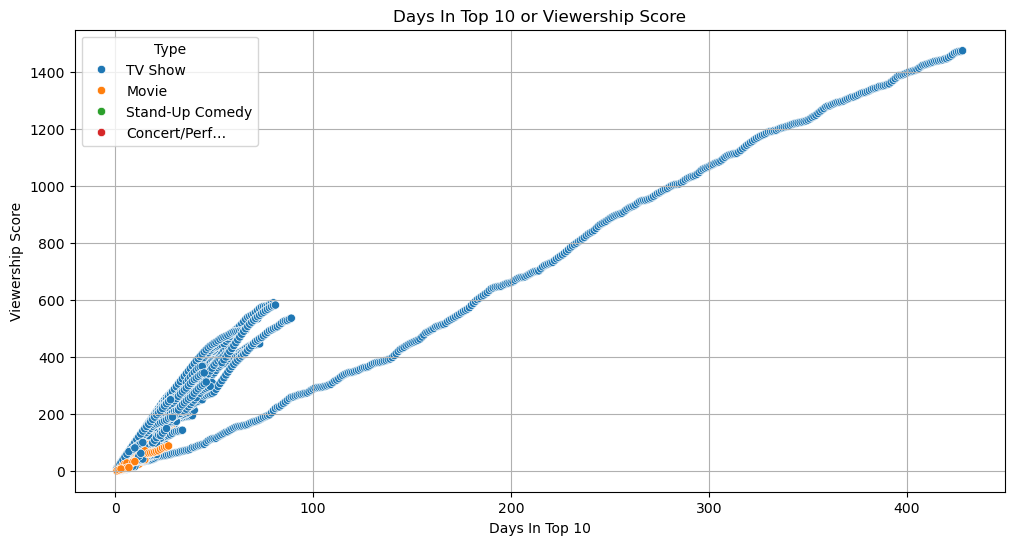

In [41]:
# Scatter plot of days in Top 10 vs viwership score

plt.figure(figsize = (12, 6))
sns.scatterplot(data = df, x = 'Days In Top 10', y = 'Viewership Score', hue = 'Type')
plt.title('Days In Top 10 or Viewership Score')
plt.xlabel('Days In Top 10')
plt.ylabel('Viewership Score')
plt.legend(title = 'Type')
plt.grid(True)
plt.show()

- The tv show viewership score dominant in netflix
- Comparing to movie or other genre the Tv show majority of Top 10 Days

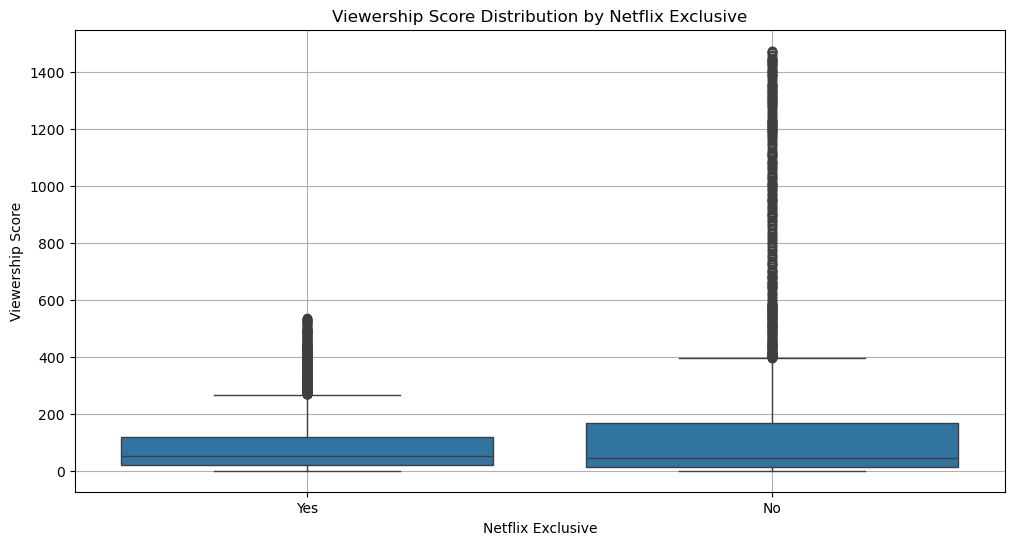

In [44]:
# Netflix Exclusive vs Viewership Score

plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'Netflix Exclusive', y = 'Viewership Score')
plt.title('Viewership Score Distribution by Netflix Exclusive')
plt.xlabel('Netflix Exclusive')
plt.ylabel('Viewership Score')
plt.grid(True)
plt.show()

- Above boxplot the average viewership in the non-netflix exclusive has a higher than netflix exclusive
- And the outlier and extreme are also the higher viewership score in non-netflix exclusive

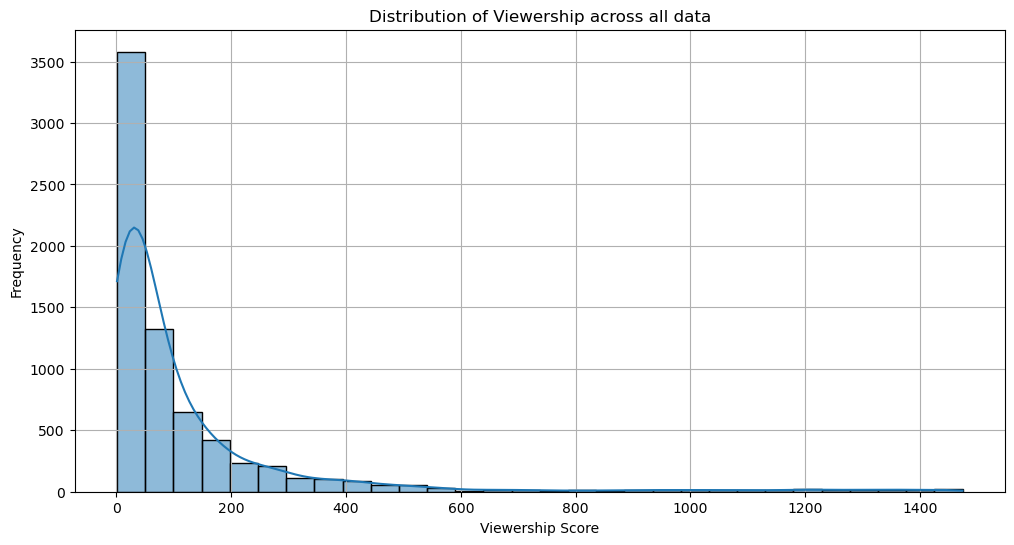

In [49]:
# Distribution of Viewership Score across all data

plt.figure(figsize = (12,6))
sns.histplot(df['Viewership Score'], bins=30, kde=True)
plt.title('Distribution of Viewership across all data')
plt.xlabel('Viewership Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 📊Key Insights:
Cocomelon as an Outlier

- Cocomelon stands out with unusually high longevity and viewership scores.

- This is likely due to frequent, repeated viewership by younger audiences.

Squid Game vs. Sustained Hits

- Although Squid Game was a viral sensation, it spent fewer days in the Top 10 compared to shows like Cobra Kai or Ozark.

- This highlights how quick spikes in popularity can differ from long-term performance.

Correlation Between Viewership Score and Days in Top 10

- Generally, shows with more days in the Top 10 tend to have higher viewership scores.

- However, viral outliers like Squid Game may skew this trend.

Netflix Exclusive vs. Non-Exclusive Content

- Netflix Originals show steady viewership, but Non-Netflix titles sometimes have even higher scores.

- This could be influenced by strong external fanbases or outliers like Cocomelon.

Impact of Duration and Branding

- Shows with longer availability and catchy or recognizable titles tend to perform better in terms of viewership.

- Duration on the platform may directly influence cumulative viewership scores.


### Conclusion:
- The analysis of Netflix content performance reveals nuanced dynamics between virality, longevity, and content origin. Outliers like Cocomelon underscore the impact of repeat viewership and niche audiences, while Squid Game illustrates how viral phenomena can achieve massive short-term success without sustained chart presence. A general correlation exists between viewership scores and time spent in the Top 10, but exceptions highlight the complexity of audience behavior. Interestingly, Non-Netflix titles can outperform Originals, suggesting external fanbases and brand recognition play a crucial role. Overall, duration on the platform and effective branding emerge as key drivers of long-term engagement and viewership.